## Building an image classification model using very little data
Based on the tutorial by Francois Chollet @fchollet https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html and the workbook by Guillaume Dominici https://github.com/gggdominici/keras-workshop

This tutorial presents several ways to build an image classifier using keras from just a few hundred or thousand pictures from each class you want to be able to recognize.

We will go over the following options:
 * training a small network from scratch (as a baseline)
 * using the bottleneck features of a pre-trained network
 * fine-tuning the top layers of a pre-trained network

This will lead us to cover the following Keras features:

* fit_generator for training Keras a model using Python data generators
* ImageDataGenerator for real-time data augmentation
* layer freezing and model fine-tuning
* ...and more.

# Data loading

In [2]:
##This notebook is built around using tensorflow as the backend for keras
!pip install pillow
!KERAS_BACKEND=tensorflow python -c "from keras import backend"

Using TensorFlow backend.


In [4]:
%pylab inline
##Updated to Keras 2.0
##Updated to Keras 2.0
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras import applications
from keras.models import Model
from IPython.display import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

os.chdir('/Users/manishrai/Desktop/DSMLAI/Artificial_Intelligence')

Populating the interactive namespace from numpy and matplotlib


## Data loading from

In [5]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'

In [11]:
!ls data/train/cats/

cat.4385.jpg cat.4586.jpg cat.4787.jpg cat.4988.jpg cat.5189.jpg cat.5390.jpg
cat.4386.jpg cat.4587.jpg cat.4788.jpg cat.4989.jpg cat.5190.jpg cat.5391.jpg
cat.4387.jpg cat.4588.jpg cat.4789.jpg cat.4990.jpg cat.5191.jpg cat.5392.jpg
cat.4388.jpg cat.4589.jpg cat.4790.jpg cat.4991.jpg cat.5192.jpg cat.5393.jpg
cat.4389.jpg cat.4590.jpg cat.4791.jpg cat.4992.jpg cat.5193.jpg cat.5394.jpg
cat.4390.jpg cat.4591.jpg cat.4792.jpg cat.4993.jpg cat.5194.jpg cat.5395.jpg
cat.4391.jpg cat.4592.jpg cat.4793.jpg cat.4994.jpg cat.5195.jpg cat.5396.jpg
cat.4392.jpg cat.4593.jpg cat.4794.jpg cat.4995.jpg cat.5196.jpg cat.5397.jpg
cat.4393.jpg cat.4594.jpg cat.4795.jpg cat.4996.jpg cat.5197.jpg cat.5398.jpg
cat.4394.jpg cat.4595.jpg cat.4796.jpg cat.4997.jpg cat.5198.jpg cat.5399.jpg
cat.4395.jpg cat.4596.jpg cat.4797.jpg cat.4998.jpg cat.5199.jpg cat.5400.jpg
cat.4396.jpg cat.4597.jpg cat.4798.jpg cat.4999.jpg cat.5200.jpg cat.5401.jpg
cat.4397.jpg cat.4598.jpg cat.4799.jpg cat.5000.jpg cat.5201.jpg

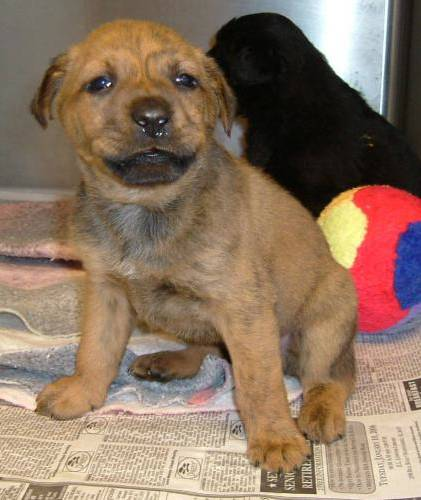

In [9]:
from IPython.display import Image
Image(filename = 'data/train/dogs/dog.4017.jpg')

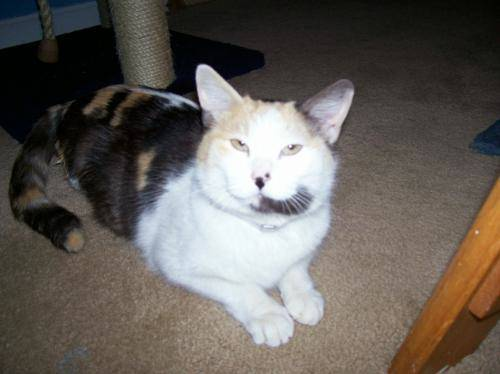

In [12]:
Image(filename = 'data/train/cats/cat.4401.jpg')

# Imports

In [14]:
##preprocessing
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

type(validation_generator)

Found 2423 images belonging to 2 classes.
Found 770 images belonging to 2 classes.


keras.preprocessing.image.DirectoryIterator

In [16]:
##Lets look at the training data from the datagenerator
i = 0
for batch in datagen.flow_from_directory(train_data_dir,
        target_size=(img_width, img_height),
        class_mode='binary',batch_size=1,
                          save_to_dir='preview', save_prefix='train', save_format='jpg'):
    i += 1
    if i > 20:
        break  #

Found 2423 images belonging to 2 classes.


In [17]:
!ls preview

train_0_6454.jpg  train_15_3425.jpg train_20_5510.jpg train_7_2476.jpg
train_10_5504.jpg train_16_4869.jpg train_2_1826.jpg  train_8_6299.jpg
train_11_5243.jpg train_17_4651.jpg train_3_9643.jpg  train_9_5095.jpg
train_12_9643.jpg train_18_2653.jpg train_4_5013.jpg
train_13_8518.jpg train_19_4043.jpg train_5_942.jpg
train_14_4250.jpg train_1_9063.jpg  train_6_7618.jpg


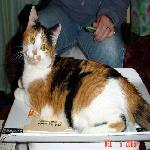

In [20]:
Image(filename = 'preview/train_6_7618.jpg')

# Small Conv Net

## Model architecture definition

In [21]:
# a simple stack of 3 convolution layers with a ReLU activation and followed by max-pooling layers.
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training

In [23]:
epochs = 1
train_samples = 2048
validation_samples = 832

In [24]:
model.fit_generator(
        train_generator,
        steps_per_epoch=train_samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_samples// batch_size,)
#About 60 seconds an epoch when using CPU

Epoch 1/1
64/64 [==============================] - 119s - loss: 0.7056 - acc: 0.5146 - val_loss: 0.6844 - val_acc: 0.5885


In [35]:

model.save_weights('models/basic_cnn_1_epochs.h5')

ImportError: `save_weights` requires h5py.

In [26]:
model.load_weights('models/basic_cnn_1_epochs.h5')

ImportError: `load_weights` requires h5py.

## Validating the models performance

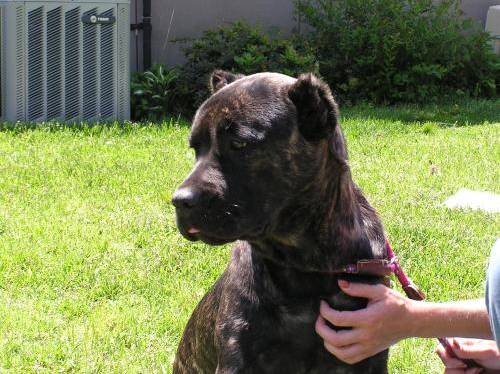

In [27]:
Image(filename = 'testing/dog.12485.jpg')

In [28]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [32]:


##Need to get prediction working
img = load_img('testing/dog_test1.jpg',False, (img_width, img_height))
x = img_to_array(img)
prediction = model.predict(x.reshape((1,img_width, img_height,3)),batch_size=32, verbose=0)
print(prediction)

[[ 1.]]


In [34]:
##Need to get prediction working
img = load_img('testing/cat.11672.jpg',False, (img_width, img_height))
x = img_to_array(img)
prediction = model.predict(x.reshape((1,img_width, img_height,3)),batch_size=32, verbose=0)
print(prediction)

[[ 1.]]


In [36]:
from keras.applications.vgg16 import VGG16
#model_vgg = VGG16(weights='imagenet', include_top=True)
from quiver_engine import server
#server.launch(model_vgg,input_folder='./raj')

ImportError: No module named quiver_engine

In [37]:
model.evaluate_generator(validation_generator, validation_samples)

[0.68296486003215884, 0.73073422324671911]